In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)



# Combine the data into a single dataset

merged_data= pd.merge(city_data_df, ride_data_df, on="city")
merged_data.head()
# Combine the data into a single dataset

# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

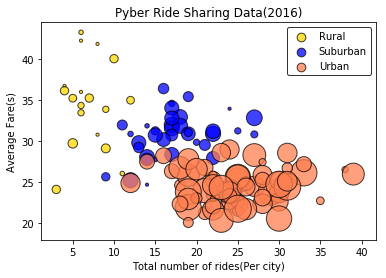

In [11]:
# Obtain the x and y coordinates for each of the three city types

city = merged_data.groupby('city')

avg_fare = city.mean()['fare']

ride_count = city['ride_id'].count()

driver_count = city.mean()['driver_count']

city_type = city_data_df.set_index('city')['type']

city_data = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_data.sort_values('Number of Drivers', ascending = False)

# Build the scatter plots for each city types

rural = city_data[city_data['Type of City'] == 'Rural']
suburban = city_data[city_data['Type of City'] == 'Suburban']
urban = city_data[city_data['Type of City'] == 'Urban']

colors_city = ["Gold","Blue","Coral"]

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color= "gold", edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = "blue", edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = "Coral", edgecolor = 'black', label = 'Urban', alpha = .75)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total number of rides(Per city)')
plt.ylabel('Average Fare(s)')
# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()
# Incorporate a text label regarding circle size

# Save Figure


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

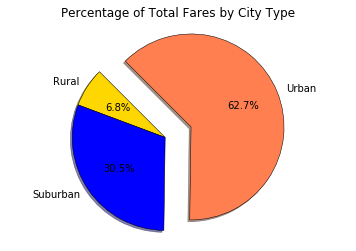

In [24]:
# Calculate Type Percents
city_type = merged_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# Build Pie Chart
fare_sum =  city_type.sum()['fare']

labels = fare_sum.index
colors_city = ["Gold","Blue","Coral"]

explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 135, colors= colors_city, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Fares by City Type')
plt.axis('equal')
plt.show()
# Save Figure



In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

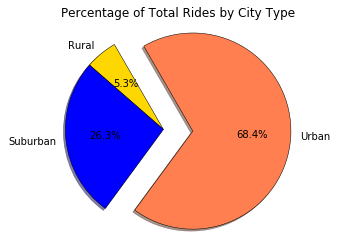

In [23]:
# Calculate Ride Percents
ride_sum = city_type.count()['ride_id']

labels = ride_sum.index
explode = [0 , 0, .3]


plt.pie(ride_sum, startangle = 120, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Rides by City Type')
plt.axis('equal')
plt.show()
# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

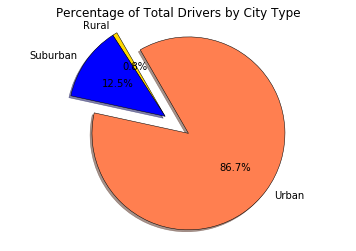

In [27]:
# Calculate Driver Percents

# of driver per city type
driver_sum = city_type.sum()['driver_count']

labels = driver_sum.index
explode = [0 , 0, .3]


plt.pie(driver_sum, startangle = 120, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Drivers by City Type')
plt.axis('equal')
plt.show()
# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()